<div style="color:red;background-color:black">
Diamond Light Source

<h1 style="color:red;background-color:antiquewhite"> Python Fundamentals: Numpy</h1>  

©2000-20 Chris Seddon 
</div>

## 1
Execute the following cell to activate styling for this tutorial

In [1]:
from IPython.display import HTML
HTML(f"<style>{open('my.css').read()}</style>")

## 2
Numpy is a library that lets us work with multi-dimensional arrays.  

Most scientific analysis in Python uses Numpy.  Several libraries extend Numpy including Pandas (which is dealt with in a separate tutorial).

Let's begin by creating some Numpy arrays:

In [7]:
import numpy as np

np.set_printoptions(precision=3)

# create array filled with 1's
a = np.ones( (3,5) ); print(f"a = \n{a}")
b = np.ones( (3,5) ) * 13; print(f"b = \n{b}")

# create array filled with 0's
c = np.zeros( (3,5) ); print(f"c = \n{c}")

# create empty array of ints
d = np.empty( (3,5), dtype=int); print(f"d = \n{d}") 

a = 
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
b = 
[[13. 13. 13. 13. 13.]
 [13. 13. 13. 13. 13.]
 [13. 13. 13. 13. 13.]]
c = 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
d = 
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


## 3
By default Numpy creates arrays of floats, but the last example shows how to work with arrays of int.  By the way, Numpy works with an internal precision of about 15 significant figures for floats, but the statement
<pre>np.set_printoptions(precision=3)</pre>
is just for rounding the printed output to 3 decimal places.  

Numpy arrays are different from ordinary Python lists or tuples.  Let's check the type of a Numpy array:

In [8]:
import numpy as np

a = np.ones( (3,5) )
print(type(a))

<class 'numpy.ndarray'>


## 4

All Numpy arrays are stored as 1 dimensional arrays, irrespective of their real dimensionality.  The data in the array is pointed at by a structure called the "view" which contains, amongst other things, this dimensionality information.

In the following example we create two Numpy arrays sharing the same set of data, but having different views.  The first array is created with "arange" and the second is a shallow copy of the first, but with its dimensionality changed using the "resize" function.

"arange" is Numpy's versionof the range generator.  And no, its not a mispelling of "arrange"; it stands for "array range".  Where it differs from the built in "range" generator is that it can be used with floating points numbers.

"reshape" takes an existing Numpy array and creates a new view on the same data.  The idea is that the new view contains different dimensionality data.  Since the data is unchanged, the new dimensions must contain the same number of data points as the original array.  Thus in the example below, we start with a 1 dimensional array with 24 elements and reshape it to a 3 dimensional array with 2 * 3 * 4 = 24 elements.  

<img src="images/Slide9.jpg" style="margin-bottom: -25%;"/>


In [11]:
import numpy as np

a = np.arange(24); print(f"a = \n{a}")
# reshape it
b = a.reshape(2,3,4); print(f"\nb = \n{b}")

a = 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

b = 
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


## 5
We can prove these two Numpy arrays share data by modifying one of the arrays - the other array sees the changes:

In [13]:
import numpy as np

a[13] = 99
print(f"a = \n{a}")
print(f"\nb = \n{b}")

a = 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 99 14 15 16 17 18 19 20 21 22 23]

b = 
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 99 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


## 6
Creating some more Numpy arrays ...

In [17]:
import numpy as np

# create array from a Python list
a = np.array( [2,3,5,7,11,13,17] ); print(f"a = \n{a}")
b = np.array( [ [3,4],[5,6] ]); print(f"\nb = \n{b}")

# create array with random values
c = np.array( np.random.random((2,3)) ); print(f"\nc = \n{c}")

a = 
[ 2  3  5  7 11 13 17]

b = 
[[3 4]
 [5 6]]

c = 
[[0.312 0.052 0.16 ]
 [0.009 0.663 0.558]]


## 7
Numpy works with multi-dimensional data (vectors) rather than scalers.  However we may want to work with an existing function that only takes scaler input.  If we try passing a list to such a function it fails:

In [18]:
def square(x): 
    return x**2

x = range(5, 10)
print(square(x))

TypeError: unsupported operand type(s) for ** or pow(): 'range' and 'int'

## 8
To overcome this, Numpy provides a "vectorize" function.  This we allow us to pass vectors to our function whilst still allowing it to work with scalers:

In [19]:
import numpy as np

def square(x): return x * x

# vectorize function to return floats
square = np.vectorize(square, otypes=[np.float])
x = range(5, 10)
print(square(x))         # now works for vectors
print(square(10))        # but still works for scalars

[25. 36. 49. 64. 81.]
100.0


## 9
In Numpy you can perform matrix arithmetic on 2 dimensional arrays.  For example to matrix multiply two arrays:

In [20]:
import numpy as np
a = np.array( [[3,4,5],[2,3,8],[4,1,7],[2,1,2]] ); print(f"a = \n{a}")
b = np.array( [[2,3,1,6],[1,2,4,5],[3,0,2,5]] ); print(f"b = \n{b}")
c = a @ b; print(f"c = \n{c}")

a = 
[[3 4 5]
 [2 3 8]
 [4 1 7]
 [2 1 2]]
b = 
[[2 3 1 6]
 [1 2 4 5]
 [3 0 2 5]]
c = 
[[25 17 29 63]
 [31 12 30 67]
 [30 14 22 64]
 [11  8 10 27]]


## 10
However, if the arrays are not 2 dimensional then this wouldn't work in general.  Therefore the @ sign is only used for matrix multiplication.  All other mathematical operators and functions are performed element by element on Numpy arrays.  

It is easy to see how this scheme works on arrays of the same size.  Consider the following operations with 1 dimensional arrays.  Peforming calculations, element by element, on "a" and "b" of shape=(7,) means performing the 7 calculations:  
&nbsp;&nbsp;&nbsp;&nbsp;3 * 5 + 2 = 17  
&nbsp;&nbsp;&nbsp;&nbsp;3 * 5 + 2 = 17  
&nbsp;&nbsp;&nbsp;&nbsp;3 * 5 + 2 = 17  
&nbsp;&nbsp;&nbsp;&nbsp;3 * 5 + 2 = 17  
&nbsp;&nbsp;&nbsp;&nbsp;4 * 6 + 2 = 26  
&nbsp;&nbsp;&nbsp;&nbsp;3 * 5 + 2 = 17  
&nbsp;&nbsp;&nbsp;&nbsp;3 * 5 + 2 = 17  
and storing the answers in "c".  

We'll leave what to do about arrays of different sizes until later in this tutorial.

In [22]:
a = np.array( [3,3,3,3,4,3,3] ); print(f"a = \n{a}")
b = np.array( [5,5,5,5,6,5,5] ); print(f"\nb = \n{b}")

# operations are performed on each element
c = a * b + 2
print(f"\nc = \n{c}")

a = 
[3 3 3 3 4 3 3]

b = 
[5 5 5 5 6 5 5]

c = 
[17 17 17 17 26 17 17]


## 11
Sometimes we need to change the type of data in a Numpy array.  For example, with images, pixel values can be stored as decimal (from 0.0 to 1.0) or as integers (0 to 255).  If we are creating a black and white image, we might set the array up with integers 0 or 1 and then convert the array to floats.  Such operations are called casts.

Below are some examples.  Note the use of the "fronfunction" method.  This method calls a function (lambda) to calculate the value of each element in the array.  Since we are creating a (4,4) array, there will be 16 calculations to perform.  The "i" and "j" inputs to the lambda witll vary from 0 to 3, and calculate: <pre>(i+2) * (j+2)**1.4</pre>

In [23]:
import numpy as np
np.set_printoptions(precision=3)

# start with a float64 array
array1 = np.fromfunction(lambda i,j: (i+2)*(j+2)**1.4, (4,4))
print(array1.dtype)
print(array1)

# casting creates a new array of int
array2 = array1.astype(int)
print(array2.dtype)
print(array2)

# casting creates a new array of bool
array3 = array1.astype(bool)
print(array3.dtype) 
print(array3)

float64
[[ 5.278  9.311 13.929 19.037]
 [ 7.917 13.967 20.893 28.555]
 [10.556 18.622 27.858 38.073]
 [13.195 23.278 34.822 47.591]]
int64
[[ 5  9 13 19]
 [ 7 13 20 28]
 [10 18 27 38]
 [13 23 34 47]]
bool
[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


## 12
As with ordinary Python arrays (lists and tuple) we can use slicing.  The notation in Numpy is slightly different from normal - all the slicing parameters are enclosed in a single set of [ ] brackets.

In [30]:
import numpy as np

# one dimensional arrays
a = np.arange(20); print(f"a = {a}")
print(f"a[7:14] = {a[7:14]}")
print(f"a[2:14:3] = {a[2:14:3]}")
print(f"a[::] = {a[::]}")

a = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
a[7:14] = [ 7  8  9 10 11 12 13]
a[2:14:3] = [ 2  5  8 11]
a[::] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## 13
Note the default slice, `a[::]`, creates a shallow copy of "a".

In [33]:
import numpy as np

a = np.arange(20)
b = a[::]
print(f"id(a) = {id(a)}")
print(f"id(b) = {id(b)}")
b[2] = 99
print(f"a = {a}")
print(f"b = {b}")

id(a) = 4569115024
id(b) = 4569115104
a = [ 0  1 99  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
b = [ 0  1 99  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## 14
We can also slice multi-dimensional arrays.  In the following example we slice elements 0 and 1 of each dimension.  Thus we will end up with a 2 x 2 x 2 array:

In [38]:
import numpy as np

# multi-dimensional arrays
a = np.arange(24).reshape(4,3,2)
print(f"a = \n{a}")

b = a[0:2,0:2,0:2]
print(f"\nb = \n{b}")

a = 
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]

 [[18 19]
  [20 21]
  [22 23]]]

b = 
[[[0 1]
  [2 3]]

 [[6 7]
  [8 9]]]


## 15
Sometimes we want to combine two arrays into one.  We can use horizontal or vertical stacking for this:

In [40]:
import numpy as np

a = np.ones( (3,5) )
b = np.zeros( (3,5) )

print("horizontal stacking")
h = np.hstack( (a,b) ); print(h)
print("vertical stacking")
v = np.vstack( (a,b) ); print(v)


horizontal stacking
[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
vertical stacking
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


## 16
Next we look at indexing.  This is where we select parts of an Numpy array that we are interested in.  Similar to slicing, indexing is a little more flexible because selected elements do not need to be adjacent.  

If the index is 1 dimensional, when it is applied to the original array, we will obtain a new 1 dimensional array.  If the index is 2 dimensional, the result will be 2 dimensional.

Here is an example:

In [47]:
import numpy as np

# set up an array to be used in indexing
a = np.arange(10)**2; print(f"a = {a}")

# setup index arrays
index1 = np.array( [2,3,5,9] )
index2 = np.array( [[5,9],[2,3]])

# apply indexes to a
print(f"\napplying index1 to a:\n {a[index1]}")
print(f"\napplying index2 to a:\n {a[index2]}")

a = [ 0  1  4  9 16 25 36 49 64 81]

applying index1 to a:
 [ 4  9 25 81]

applying index2 to a:
 [[25 81]
 [ 4  9]]


## 17
Indexing has applications in image processing.  If we have a monochrome image with pixel values between 0 and 255, we can convert it to a black and white image.  To do this, we define a theshold, above which we change pixels to white (255) and otherwise to black (0).

Images once read into memory are usually converted to a Numpy array.  So, to see in principal, how this conversion would take place, let's define a Numpy array to represent an image and apply indexing to it.  

As you can see from the results, the index is a boolean, with True or False defined for every pixel, dependent on the threshold value.  Then we set all the pixels with a True value to white (255).  Lastly we set all the pixels with False (~True) to black (0) to get our black and white monochrome image.

Note that MatPlotLib will use a colormap when it displays the image.  To display a true monochrome image we need to use "Greys" for the colormap.

create an image


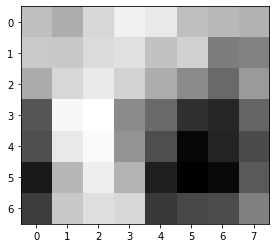

setup boolean index based on a threshold:
[[False  True False False False False  True  True]
 [False False False False False False  True  True]
 [ True False False False  True  True  True  True]
 [ True False False  True  True  True  True  True]
 [ True False False  True  True  True  True  True]
 [ True  True False  True  True  True  True  True]
 [ True False False False  True  True  True  True]]

apply the threshold to the image:
[[120   0  98  67  78 120   0   0]
 [110 112  93  88 117 103   0   0]
 [  0  97  76 102   0   0   0   0]
 [  0  56  44   0   0   0   0   0]
 [  0  78  54   0   0   0   0   0]
 [  0   0  72   0   0   0   0   0]
 [  0 111  90  98   0   0   0   0]]


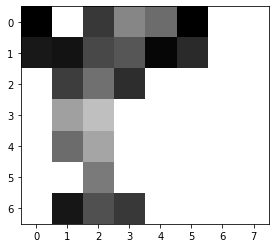


add in the inverse threshold to the image:
[[255   0 255 255 255 255   0   0]
 [255 255 255 255 255 255   0   0]
 [  0 255 255 255   0   0   0   0]
 [  0 255 255   0   0   0   0   0]
 [  0 255 255   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0]
 [  0 255 255 255   0   0   0   0]]


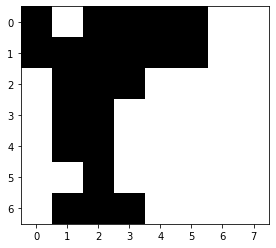

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

print("create an image")
image = np.array(
        [[120, 132,  98,  67,  78, 120, 125, 129],
         [110, 112,  93,  88, 117, 103, 167, 162],
         [134,  97,  76, 102, 132, 156, 182, 145],
         [196,  56,  44, 156, 181, 219, 225, 184],
         [201,  78,  54, 149, 202, 247, 226, 204],
         [234, 126,  72, 128, 230, 252, 245, 194],
         [212, 111,  90,  98, 214, 206, 203, 163]])
plt.imshow(image, cmap="Greys")
plt.show()

thresholdIndex = image > 120
print("setup boolean index based on a threshold:")
print(thresholdIndex)

print("\napply the threshold to the image:")
image[thresholdIndex] = 0
print(image)
plt.imshow(image, cmap="Greys")
plt.show()

print("\nadd in the inverse threshold to the image:")
image[~ thresholdIndex] = 255
print(image)
plt.imshow(image, cmap="Greys")
plt.show()

## 18


## 19


## 20
